In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#%matplotlib inline # Para mostrar gráficos dentro de Jupyter Notebooks

In [2]:
def leer_boston():
    url = "https://lib.stat.cmu.edu/datasets/boston" # URL del conjunto de datos de viviendas en Boston
    df = pd.read_csv(url, sep="\s+", skiprows=22, header=None) # Leer el archivo CSV desde la URL, omitiendo las primeras 22 filas, y sin encabezados.
    # El conjunto de datos tiene 14 columnas, las primeras 13 son características y la última es el precio de la vivienda.
    data = np.hstack([df.values[::2, :], df.values[1::2, :2]]) # Combinar filas pares e impares para formar un DataFrame completo
    target = df.values[1::2, 2] # La variable objetivo (precio de la vivienda) está en la segunda columna de cada fila par
    return {"data": data, "target": target, "features_names": ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']}

In [3]:
data = leer_boston()
X = pd.DataFrame(data['data'], columns=data['features_names'])  # Características
y = data['target']  # Variable objetivo (precio de la vivienda)
y = y.reshape(-1, 1)  # Convertir y a una matriz columna

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [6]:
df = pd.DataFrame(np.append(X, y, axis=1), columns=data['features_names'] + ['PRICE']) # Crear un DataFrame completo con características y precio
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
np.round(df.corr(), 2) # Matriz de correlación redondeada a 2 decimales

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


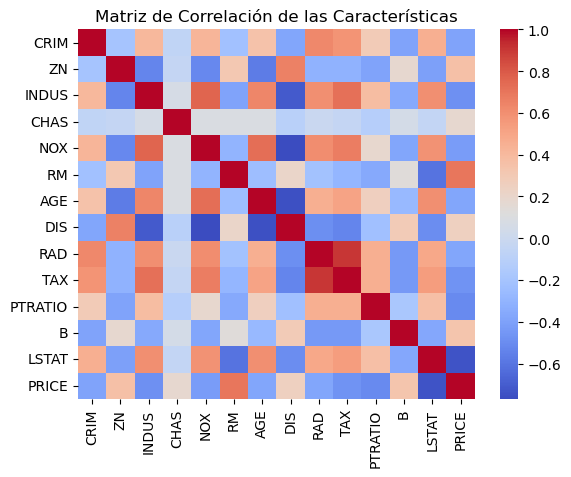

In [11]:
sns.heatmap(np.round(df.corr(), 2), cmap='coolwarm') # Mapa de calor de la matriz de correlación en Seaborn
plt.title('Matriz de Correlación de las Características')
plt.show()

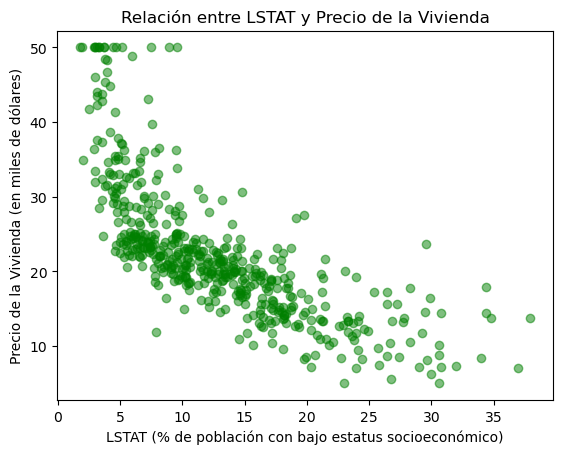

In [12]:
# LSTAT tiene una correlación negativa fuerte con el precio de la vivienda (PRICE). LSTAT representa el porcentaje de población con bajo estatus socioeconómico. A medida que LSTAT aumenta, el precio de la vivienda tiende a disminuir.
plt.scatter(df['LSTAT'], df['PRICE'], color='green', alpha=0.5)
plt.title('Relación entre LSTAT y Precio de la Vivienda')
plt.xlabel('LSTAT (% de población con bajo estatus socioeconómico)')
plt.ylabel('Precio de la Vivienda (en miles de dólares)')
plt.show()

## Entrenar el modelo de regresión

In [13]:
model = LinearRegression() # Crear una instancia del modelo de regresión lineal
#model.fit(df.drop('PRICE', axis=1), df['PRICE']) # Entrenar el modelo con todas las características para predecir el precio de la vivienda
variables_independientes = df.iloc[:,:-1]  # Todas las columnas excepto la última (PRICE)
variable_dependiente = df.iloc[:,-1]  # Solo la última columna (PRICE)
model.fit(variables_independientes, variable_dependiente)  # Entrenar el modelo

LinearRegression()

In [14]:
print("Intercepto:", model.intercept_) # Mostrar el intercepto del modelo. Cuando todas las características son cero, este es el valor predicho de PRICE.
print("Coeficientes:", model.coef_) # Mostrar los coeficientes del modelo. Cada coeficiente representa el cambio esperado en PRICE por un cambio unitario en la característica correspondiente, manteniendo las demás constantes.

Intercepto: 36.45948838509025
Coeficientes: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [15]:
#Y = a + b1*x1 + b2*x2 + ... + bn*xn # a es el intercepto, bi son los coeficientes, xi son las características
#PRICE = a + b1*CRIM + b2*ZN + b3*INDUS + b4*CHAS + b5*NOX + b6*RM + b7*AGE + b8*DIS + b9*RAD + b10*TAX + b11*PTRATIO + b12*B + b13*LSTAT
#PRICE  = 36.46 + (-0.11)*CRIM + 0.05*ZN + 0.02*INDUS + 2.69*CHAS + (-17.77)*NOX + 3.81*RM + 0.00*AGE + (-1.48)*DIS + 0.31*RAD + (-0.01)*TAX + (-0.95)*PTRATIO + 0.01*B + (-0.52)*LSTAT

In [16]:
parametros = pd.DataFrame(model.coef_,variables_independientes.columns,columns=['Coeficiente'])
intercepto_df = pd.DataFrame(model.intercept_, index=['Intercepto'], columns=['Coeficiente'])
parametros = pd.concat([parametros,intercepto_df])
parametros

,Coeficiente
CRIM,-0.108011
ZN,0.046420
INDUS,0.020559
CHAS,2.686734
NOX,-17.766611
RM,3.809865
AGE,0.000692
DIS,-1.475567
RAD,0.306049
TAX,-0.012335


### Diagnosticar el modelo

In [ ]:
preY = model.predict(variables_independientes) # Predecir los valores de PRICE usando las características del conjunto de datos

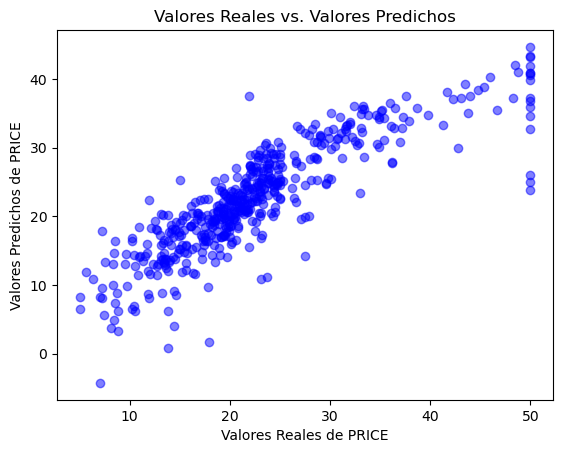

In [18]:
# Mostrar gráficamente los valores reales vs. los valores predichos
plt.scatter(variable_dependiente, preY, color='blue', alpha=0.5)
plt.title('Valores Reales vs. Valores Predichos')
plt.xlabel('Valores Reales de PRICE')
plt.ylabel('Valores Predichos de PRICE')
plt.show()

In [19]:
df['PRICE'].corr(pd.Series(preY)) # Calcular la correlación entre los valores reales y los valores predichos de PRICE

0.8606059865637756

In [20]:
# Evaluar el modelo. Coeficiente de determinación R^2. Significa qué tan bien las características independientes explican la variabilidad en la variable dependiente.
model.score(variables_independientes, variable_dependiente) # Calcular el R^2 del modelo, que indica la proporción de la varianza en PRICE que es explicada por las características independientes.

0.7406426641094095

### Tes sobre el modelo

In [21]:
X_train, X_test, y_train, y_test = train_test_split(variables_independientes, variable_dependiente, test_size=0.2, random_state=42) # Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño del conjunto de entrenamiento: (404, 13)
Tamaño del conjunto de prueba: (102, 13)
Tamaño de y_train: (404,)
Tamaño de y_test: (102,)


In [28]:
lm = LinearRegression() # Crear una nueva instancia del modelo de regresión lineal
lm.fit(X_train, y_train) # Entrenar el modelo con el conjunto de entrenamiento
predicciones_entrenamiento = lm.predict(X_train) # Predecir los valores de PRICE usando el conjunto de entrenamiento
predicciones_test = lm.predict(X_test) # Predecir los valores de PRICE usando el conjunto de prueba

print('Error Cuadrático Medio (MSE):', metrics.mean_squared_error(y_train, predicciones_entrenamiento)) # Calcular el Error Cuadrático Medio entre los valores reales y las predicciones del conjunto de prueba
print('MSE Test:', metrics.mean_squared_error(y_test, predicciones_test)) # Calcular el Error Cuadrático Medio entre los valores reales y las predicciones del conjunto de test
print('------------------------------------------------------')
print('Error Absoluto Medio (MAE):', metrics.mean_absolute_error(y_train, predicciones_entrenamiento)) # Calcular el Error Absoluto Medio entre los valores reales y las predicciones del conjunto de prueba
print('MAE Test:', metrics.mean_absolute_error(y_test, predicciones_test)) # Calcular el Error Absoluto Medio entre los valores reales y las predicciones del conjunto de test
print('------------------------------------------------------')
print('Raíz del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_train, predicciones_entrenamiento))) # Calcular la Raíz del Error Cuadrático Medio entre los valores reales y las predicciones del conjunto de prueba
print('RMSE Test:', np.sqrt(metrics.mean_squared_error(y_test, predicciones_test)))
print('------------------------------------------------------')
print('MAPE entrenamiento:', np.mean(np.abs((y_train - predicciones_entrenamiento) / y_train)) * 100) # Calcular el MAPE entre los valores reales y las predicciones del conjunto de entrenamiento
print('MAPE test:', np.mean(np.abs((y_test - predicciones_test) / y_test)) * 100) # Calcular el MAPE entre los valores reales y las predicciones del conjunto de prueba
print('------------------------------------------------------')
print('R2 entrenamiento:', metrics.r2_score(y_train, predicciones_entrenamiento)) # Calcular el R^2 entre los valores reales y las predicciones del conjunto de entrenamiento
print('R2 test:', metrics.r2_score(y_test, predicciones_test)) # Cal

Error Cuadrático Medio (MSE): 21.641412753226312
MSE Test: 24.291119474973613
------------------------------------------------------
Error Absoluto Medio (MAE): 3.314771626783227
MAE Test: 3.189091965887852
------------------------------------------------------
Raíz del Error Cuadrático Medio (RMSE): 4.6520331848801675
RMSE Test: 4.928602182665346
------------------------------------------------------
MAPE entrenamiento: 16.574914349533948
MAPE test: 16.86639453937874
------------------------------------------------------
R2 entrenamiento: 0.7508856358979673
R2 test: 0.6687594935356307


### Análisis de residuos

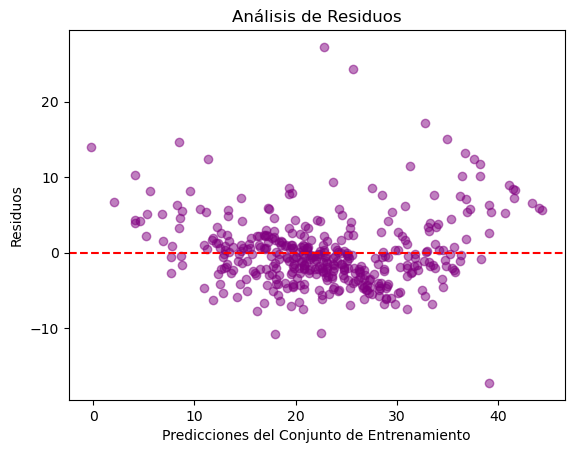

In [29]:
residuos = y_train - predicciones_entrenamiento # Calcular los residuos (diferencias entre los valores reales y las predicciones del conjunto de entrenamiento)
plt.scatter(predicciones_entrenamiento, residuos, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--') # Línea horizontal
plt.title('Análisis de Residuos')
plt.xlabel('Predicciones del Conjunto de Entrenamiento')
plt.ylabel('Residuos')
plt.show()

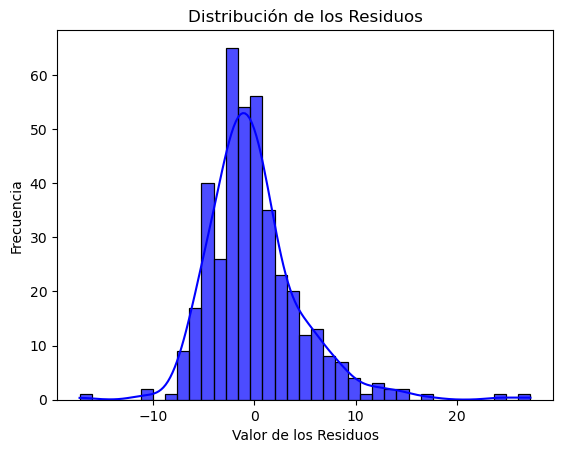

In [33]:
# Histograma de los residuos, para ver su distribución, usualmente se espera que sigan una distribución normal centrada en cero.
sns.histplot(residuos, kde=True,color='blue', alpha=0.7)
plt.title('Distribución de los Residuos')
plt.xlabel('Valor de los Residuos')
plt.ylabel('Frecuencia')
plt.show()

### Ampliación de regresiones lineales

In [34]:
import statsmodels.formula.api as smf # Importar la librería statsmodels para análisis estadístico avanzado

In [35]:
ampliacion1 = smf.ols(formula='PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=df).fit() # Crear un modelo de regresión lineal usando statsmodels con todas las características
ampliacion1.summary() # Mostrar un resumen estadístico del modelo ampliado, incluyendo coeficientes, errores estándar, valores p, R^2, entre otros.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 12 Nov 2025   Prob (F-statistic):          6.72e-135
Time:                        19:48:02   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Viendo los valores de los coeficientes de INDUS, AGE detecto que no son significativos para el precio. Voy a ajustar la fórmula quitando esos valores.
El objetivo es mantener el R-squared y disminuir los valores de AIC y BIC

In [36]:
ampliacion2 = smf.ols(formula='PRICE ~ CRIM + ZN + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=df).fit() # Crear un modelo de regresión lineal usando statsmodels con todas las características
ampliacion2.summary() # Mostrar un resumen estadístico del modelo ampliado, incluyendo coeficientes, errores estándar, valores p, R^2, entre otros.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 12 Nov 2025   Prob (F-statistic):          5.54e-137
Time:                        19:52:47   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusión: El modelo ampliación 2 es mejor, más optimizado al quitar las variables menos significativas.

## Regresión Ridge y Lasso

In [37]:
from sklearn.linear_model import Ridge, Lasso

In [38]:
# Ejemplo Ridge
ridge_model = Ridge(alpha=1.0)  # Crear una instancia del modelo de regresión Ridge con un valor de alpha
X_train, X_test, y_train, y_test = train_test_split(variables_independientes, variable_dependiente, test_size=0.2, random_state=42) # Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
ridge_model.fit(X_train, y_train)  # Entrenar el modelo Ridge con el conjunto de entrenamiento
ridge_predictions = ridge_model.predict(X_test)  # Predecir los valores de PRICE usando el conjunto de prueba
print("Ridge Model MSE:", metrics.mean_squared_error(y_test, ridge_predictions))  # Calcular y mostrar el MSE del modelo Ridge
print("Ridge Model RMSE:", np.sqrt(metrics.mean_squared_error(y_test, ridge_predictions)))  # Calcular y mostrar el RMSE del modelo Ridge
print("Ridge Model R^2:", metrics.r2_score(y_test, ridge_predictions))  # Calcular y mostrar el R^2 del modelo Ridge

Ridge Model MSE: 24.47719122770868
Ridge Model RMSE: 4.947442897872463
Ridge Model R^2: 0.6662221670168518


In [39]:
# Ejemplo de regresión Lasso
lasso_model = Lasso(alpha=1.0)  # Crear una instancia del modelo de regresión Lasso con un valor de alpha
X_train, X_test, y_train, y_test = train_test_split(variables_independientes, variable_dependiente, test_size=0.2, random_state=42) # Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
lasso_model.fit(X_train, y_train)  # Entrenar el modelo Lasso con el conjunto de entrenamiento
lasso_predictions = lasso_model.predict(X_test)  # Predecir los valores de PRICE usando el conjunto de prueba
print("Lasso Model MSE:", metrics.mean_squared_error(y_test, lasso_predictions))  # Calcular y mostrar el MSE del modelo Lasso
print("Lasso Model RMSE:", np.sqrt(metrics.mean_squared_error(y_test, lasso_predictions)))  # Calcular y mostrar el RMSE del modelo Lasso
print("Lasso Model R^2:", metrics.r2_score(y_test, lasso_predictions))  # Calcular y mostrar el R^2 del modelo Lasso

Lasso Model MSE: 24.409489761299696
Lasso Model RMSE: 4.94059609372186
Lasso Model R^2: 0.6671453631686305


In [40]:
print("Coeficientes Ridge:", ridge_model.coef_)
print("Coeficientes Lasso:", lasso_model.coef_)
print("Coeficientes Regresión Lineal:", model.coef_)

Coeficientes Ridge: [-1.09234061e-01  3.22706863e-02  7.49805942e-03  2.54546998e+00
 -9.53795159e+00  4.46450537e+00 -1.21910176e-02 -1.33870040e+00
  2.48881816e-01 -1.14746211e-02 -8.28604284e-01  1.26421124e-02
 -5.23833016e-01]
Coeficientes Lasso: [-0.07660927  0.02850064 -0.          0.         -0.          1.63048892
  0.01639478 -0.63085765  0.21965363 -0.01228558 -0.70858233  0.0111811
 -0.74710661]
Coeficientes Regresión Lineal: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


### Diagnóstico final del modelo de regresión lineal básico y regularizado.

In [42]:
modelos ={'Regresión lineal': (y_test, predicciones_test), 'Ridge': (y_test, ridge_predictions), 'Lasso': (y_test, lasso_predictions)}
for nombre, (y_true, y_pred) in modelos.items():
    print(f"\nEvaluación del modelo: {nombre}")
    print("MSE:", metrics.mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
    print("R^2:", metrics.r2_score(y_true, y_pred))
    print("Residuos: {}".format(y_true - y_pred))
    print('------------------------------------------------------')


Evaluación del modelo: Regresión lineal
MSE: 24.291119474973613
RMSE: 4.928602182665346
R^2: 0.6687594935356307
Residuos: 173    -5.396724
274    -3.625565
491    -1.216944
72     -2.231979
452    -2.669880
         ...    
412    18.064237
436    -4.084867
411     1.016403
86      0.223780
75     -3.079024
Name: PRICE, Length: 102, dtype: float64
------------------------------------------------------

Evaluación del modelo: Ridge
MSE: 24.47719122770868
RMSE: 4.947442897872463
R^2: 0.6662221670168518
Residuos: 173    -5.094080
274    -3.296250
491    -0.546047
72     -1.976929
452    -3.021794
         ...    
412    19.093637
436    -4.518958
411     1.812284
86      0.420059
75     -2.453856
Name: PRICE, Length: 102, dtype: float64
------------------------------------------------------

Evaluación del modelo: Lasso
MSE: 24.409489761299696
RMSE: 4.94059609372186
R^2: 0.6671453631686305
Residuos: 173    -4.866880
274     0.255149
491    -0.286900
72     -2.583529
452    -2.903386
    

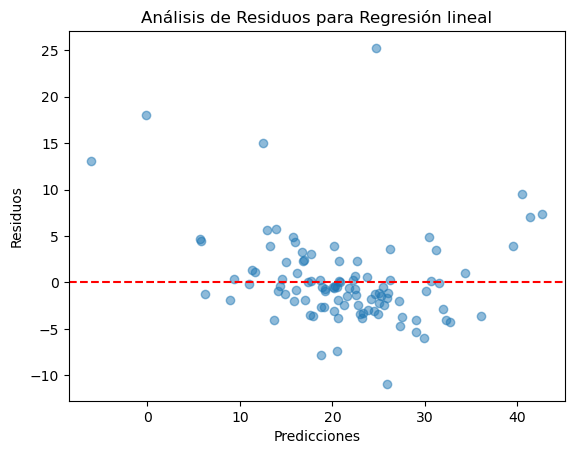

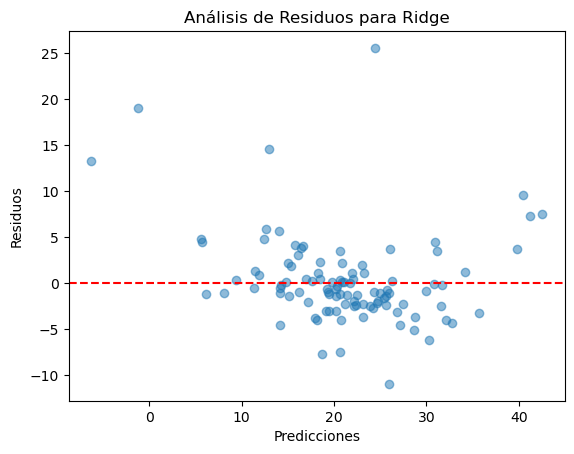

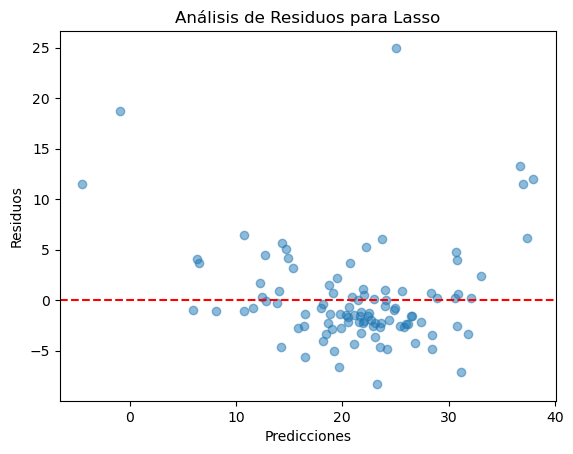

In [43]:
for nombre, (y_true, y_pred) in modelos.items():
    residuos = y_true - y_pred
    plt.scatter(y_pred, residuos, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Análisis de Residuos para {nombre}')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.show()

## Consideraciones finales

Comparación general:
- En términos de MSE, el modelo con el menor error cuadrático puede considerarse el mejor en términos de precisión en la predicción.
- En términos de R2 (coeficiente de determinación), un valor alto indica que el modelo explica mejor la variabilidad de los datos.
- Ridge y Lasso son útiles cuando se requiere un sobreajuste, especialmente con un gran número de características y con multicolinealidad.
- En este caso, se debe elegir en función de un equilibrio entre la simplicidad (Lasso), la estabilidad del sobreajuste (Ridge), y la "precisión" (Regresión lineal)

## Ejemplo de uso

- Ventas Minoristas. Múltiples características que afectan a las ventas (promociones, temporadas, tiempo, ubicación). Ridge sería útil para manejar la multicolinealidad.
- Análisis de sentimientos. Para predecir la polaridad de una opinión (positiva o negativa) en base a muchas palabras o frases. Lasso sería mejor reduciría mucho la dimensionalidad.
- Predicciones de costos de Seguros Médicos. Para estimar costos en función de características (edad, estado de salud, hábitos de vida...). Lasso podría venir bien para eliminar características redundantes y absurdas.
- Otros: Modelado de demanda de energía (Ridge), Optimización de cadenas de suministro (Ridge), Reconocimiento de Actividades Humanas (Lasso)